<h1>Image generation, techniques: </h1>

<h3><b>1. VAE (Variational AutuEncoder):</b></h3>

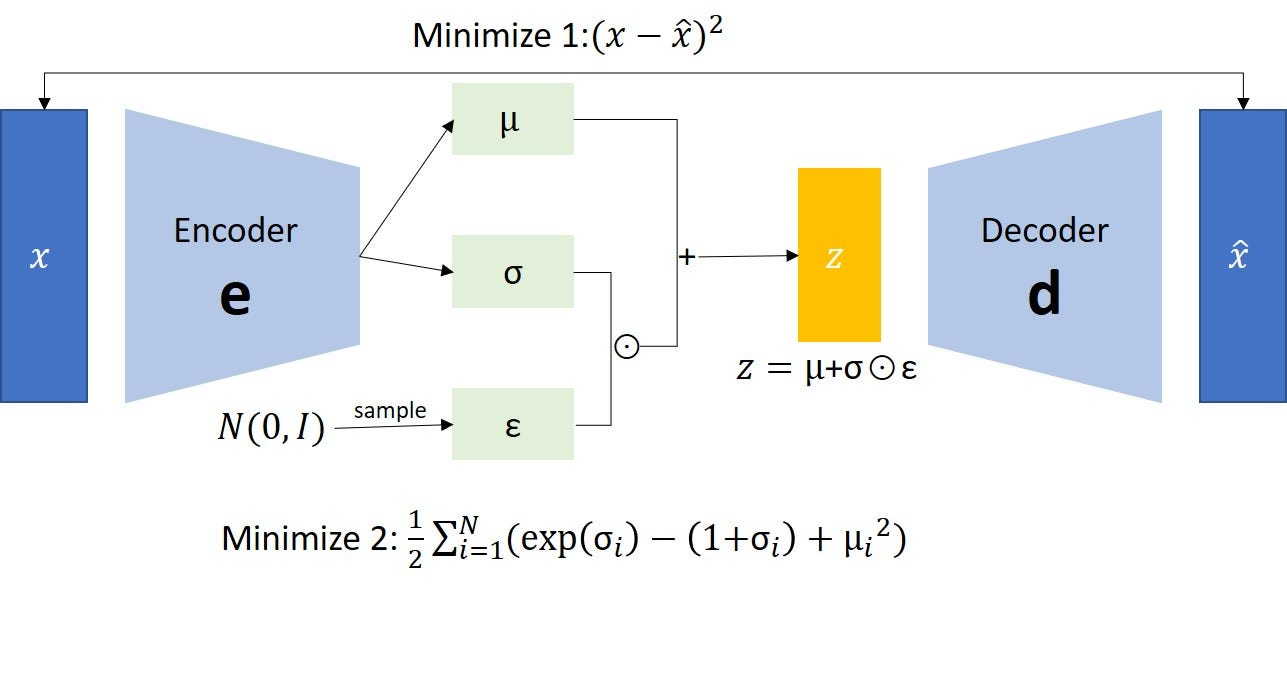
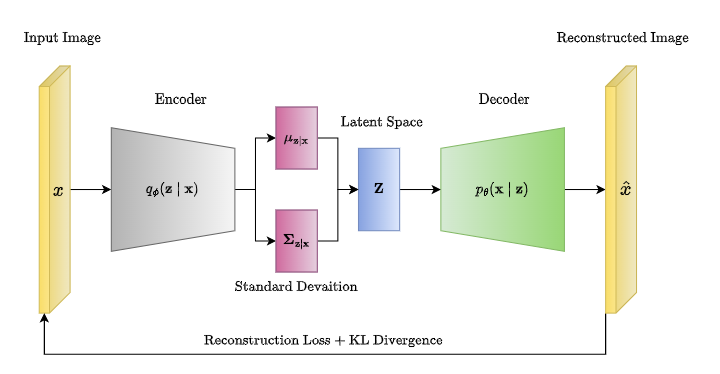

<h3><b>2. Autoregressive models:</b></h3>

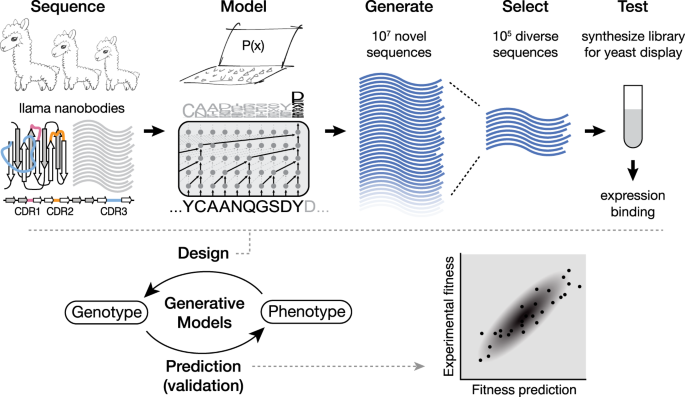
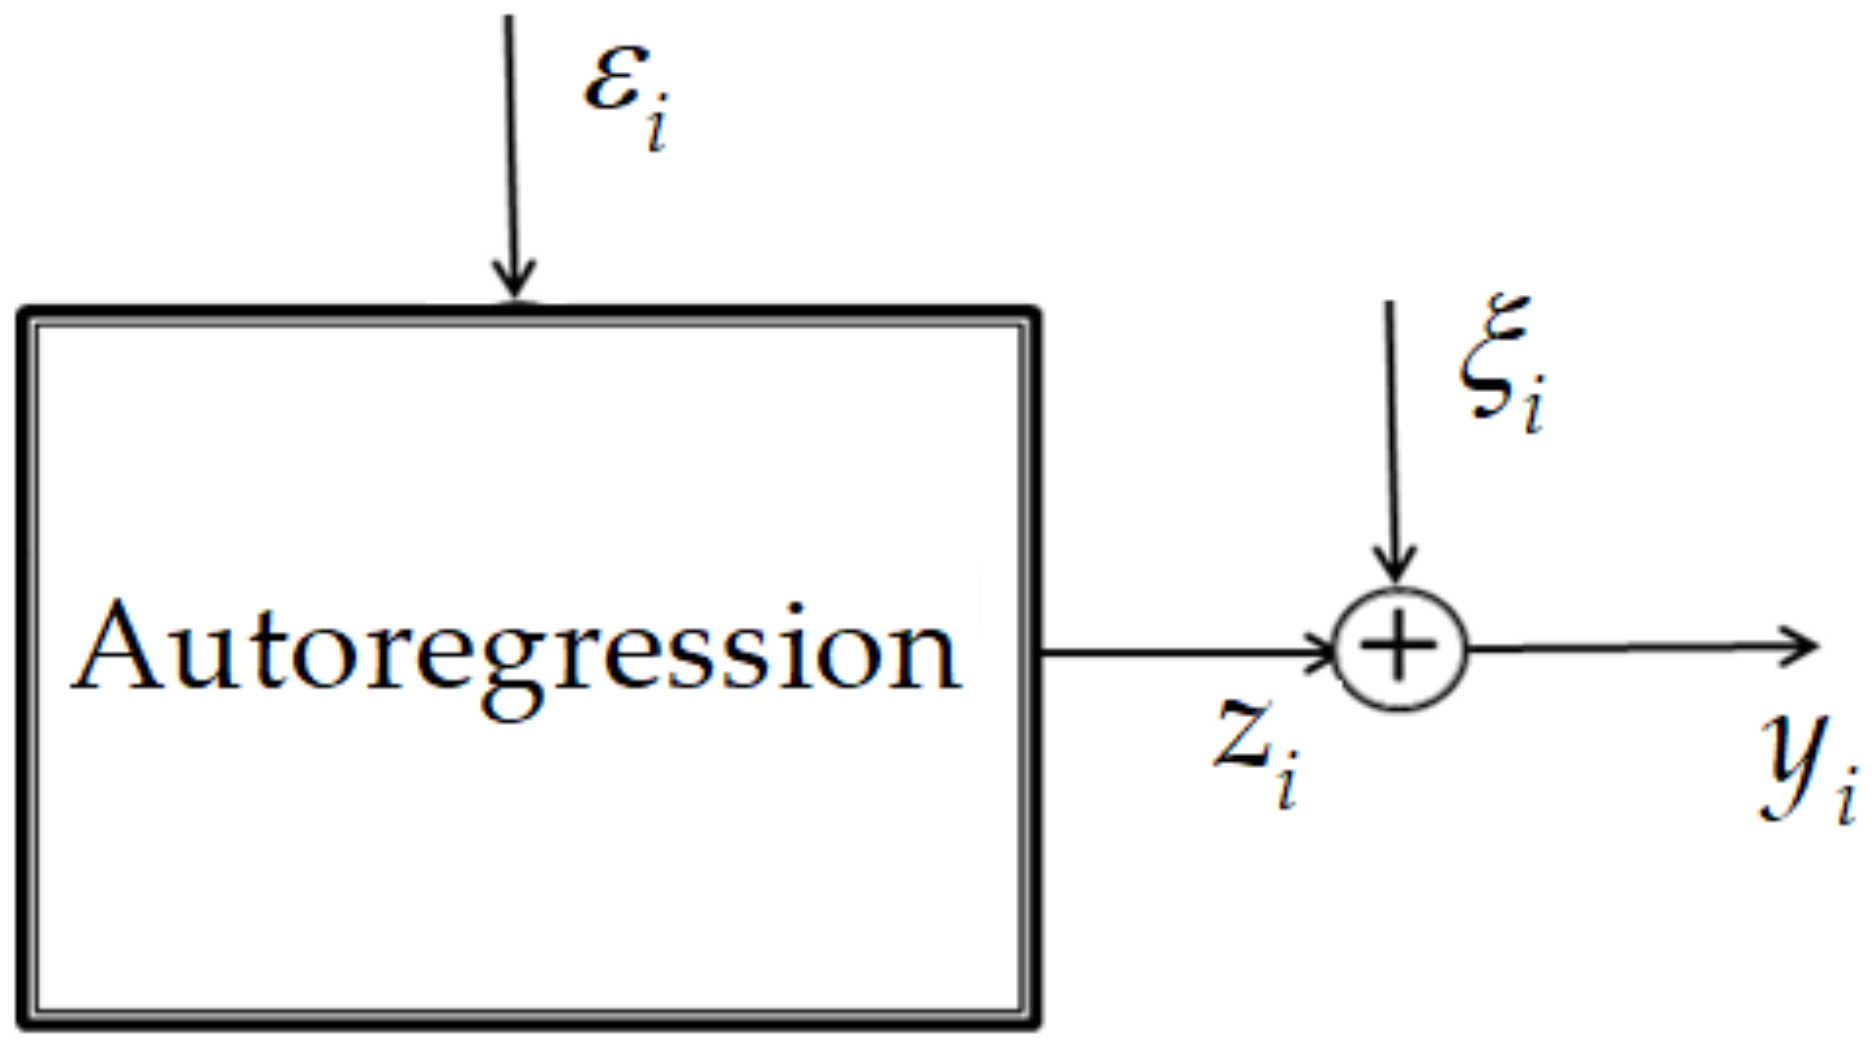
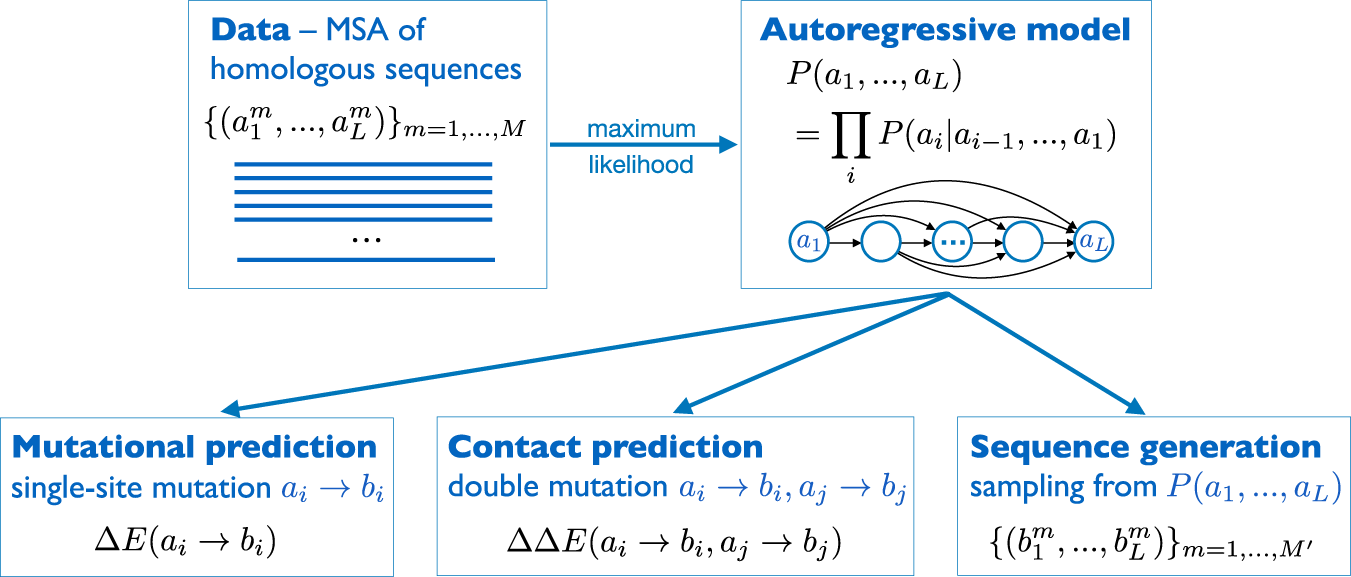

<h3><b>3. GANs (Generative Adversial Network):</b></h3>

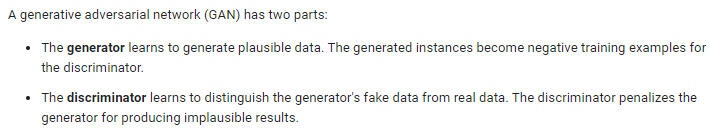
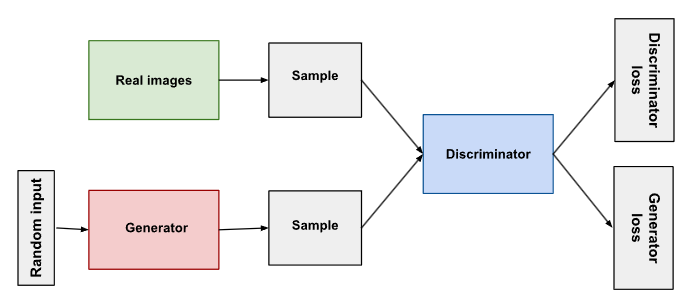
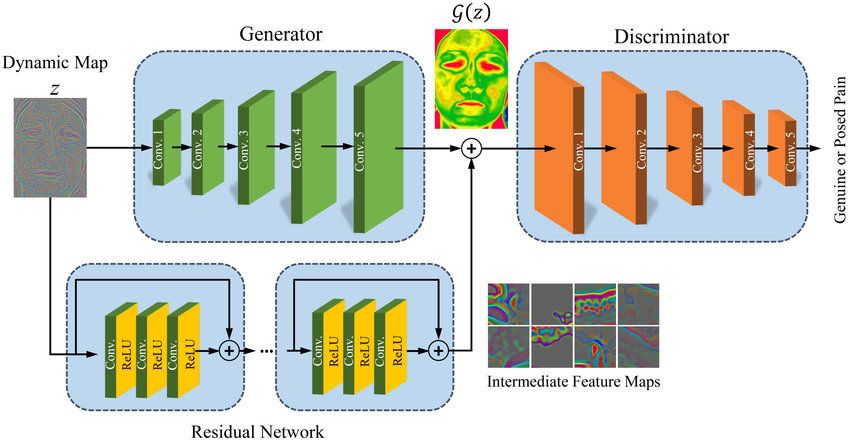
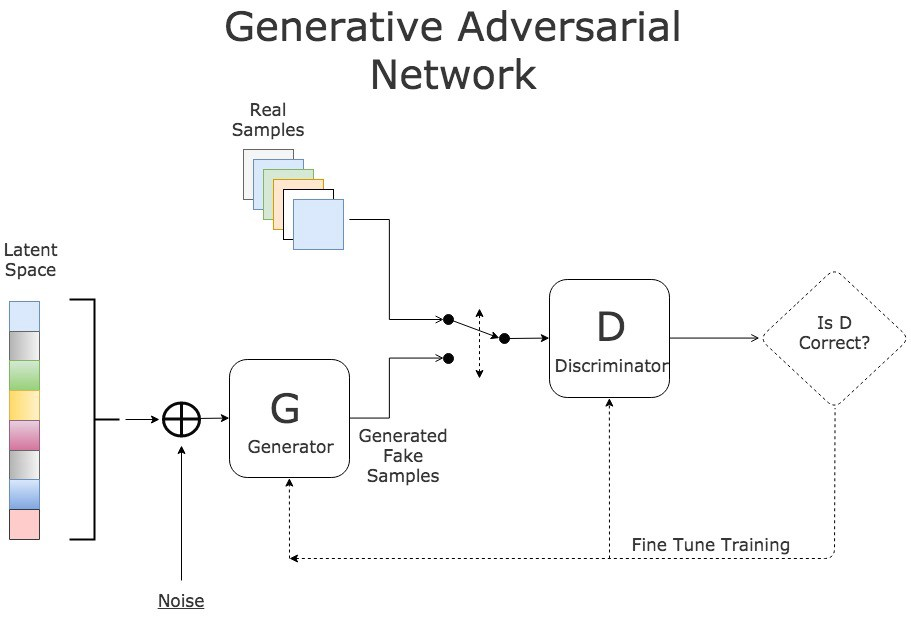

\begin{equation*}
\min_G \max_D \textrm{E}_{x \sim p(x)}[\log(D(x))] + \textrm{E}_{z \sim p(z)}[\log(1-D(G(z)))]
\end{equation*} 

Discrimator wants to maximize the probability of prediction (1) for real data, and 0 for generated. Generator wants minimize the second probility.

<h3>1. Importing libraries:</h3>

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import torch
from sklearn.datasets import load_digits

np.random.seed(10)
torch.manual_seed(10)

<h3>2. Data preprocessing:</h3>

In [232]:
digits = load_digits()
X = digits.images

print(f"X.shape: {X.shape}")
print(f"X: {X}")

X.shape: (1797, 8, 8)
X: [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0.  2. ...  6.  0.  0.]]

 [[ 0.  0.  2. ...  0.  0.  0.]
  [ 0.  0. 14. ... 15.  1.  0.]
  [ 0.  4. 16. ... 16.  7.  0.]
  ...
  [ 0.  0.  0. ... 16.  2.  0.]
  [ 0.  0.  4. ... 16.  2.  0.]
  [

In [233]:
img_channels = 1
X = X /16

print(f"X.shape: {X.shape}")
print(f"X: {X}")

X.shape: (1797, 8, 8)
X: [[[0.     0.     0.3125 ... 0.0625 0.     0.    ]
  [0.     0.     0.8125 ... 0.9375 0.3125 0.    ]
  [0.     0.1875 0.9375 ... 0.6875 0.5    0.    ]
  ...
  [0.     0.25   0.6875 ... 0.75   0.4375 0.    ]
  [0.     0.125  0.875  ... 0.75   0.     0.    ]
  [0.     0.     0.375  ... 0.     0.     0.    ]]

 [[0.     0.     0.     ... 0.3125 0.     0.    ]
  [0.     0.     0.     ... 0.5625 0.     0.    ]
  [0.     0.     0.1875 ... 0.375  0.     0.    ]
  ...
  [0.     0.     0.0625 ... 0.375  0.     0.    ]
  [0.     0.     0.0625 ... 0.375  0.     0.    ]
  [0.     0.     0.     ... 0.625  0.     0.    ]]

 [[0.     0.     0.     ... 0.75   0.     0.    ]
  [0.     0.     0.1875 ... 0.875  0.     0.    ]
  [0.     0.     0.5    ... 1.     0.     0.    ]
  ...
  [0.     0.5625 1.     ... 0.     0.     0.    ]
  [0.     0.1875 0.8125 ... 0.6875 0.3125 0.    ]
  [0.     0.     0.     ... 1.     0.5625 0.    ]]

 ...

 [[0.     0.     0.0625 ... 0.0625 0.     0. 

Real: tensor([[[[0.0000, 0.0000, 0.3125,  ..., 0.0625, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.8125,  ..., 0.9375, 0.3125, 0.0000],
          [0.0000, 0.1875, 0.9375,  ..., 0.6875, 0.5000, 0.0000],
          ...,
          [0.0000, 0.2500, 0.6875,  ..., 0.7500, 0.4375, 0.0000],
          [0.0000, 0.1250, 0.8750,  ..., 0.7500, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.3750,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.3125, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.5625, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1875,  ..., 0.3750, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0625,  ..., 0.3750, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0625,  ..., 0.3750, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.6250, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.7500, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.1875,  ..., 0.8750, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.500

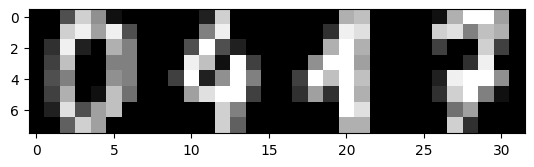

In [234]:
real = torch.tensor(X.reshape(-1, img_channels, X.shape[1], X.shape[2]))
dataset = torch.utils.data.TensorDataset(real)
data_loader = torch.utils.data.DataLoader(
    dataset, batch_size=64, 
    shuffle=True, drop_last=True
)

print(f"Real: {real}")

print(f"Original image dimension: {str(real.shape)}")
plt.imshow(np.concatenate((real[0][0],real[100][0],real[200][0], real[300][0]),axis=1), cmap='gray')

<h3>Noise generation:</h3>

In [235]:
def generate_noise(number_of_samples, channels):
    """
    Generating noise by using torch.randn function.
    """
    noise = torch.randn((number_of_samples, channels, 1, 1), dtype=torch.float64)
    return noise

In [236]:
noise_size = 64 # Number of channels
number_of_samples = 4 # Number of images
noise = generate_noise(number_of_samples, noise_size) # Noise generation, creating 4 images.
print(f"Dimension of generated noise: {str(noise.shape)}")

Dimension of generated noise: torch.Size([4, 64, 1, 1])


<h3>Generator implementation:</h3>

Used layers:
- `torch.nn.BatchNorm2d`,
- `torch.nn.ReLU`,
- `torch.nn.Conv2d`,
- `torch.nn.ConvTranspose2d` - transposed convolution (upsampling), increasing dimension of the image,
- `torch.nn.Sigmoid`,

Our CNN Generator architecture:

2x (`ConvTranspose2d` => `BatchNorm2d` => `ReLU`) => `ConvTranspose2d` => `Sigmoid`

In [237]:
class Generator(torch.nn.Module):
    """
    Model architecture:
    (ConvTranspose -> BatchNorm -> ReLU) -> (ConvTranspose -> BatchNorm -> ReLU) -> (ConvTranspose -> Sigmoid)
    """
    def __init__(self, input_channels, output_channels, padding=0, stride=1) -> None:
        super().__init__()
        number_of_conv_channels = [128, 64] # Number of channels after deconvolutions.
        kernel_sizes = [2, 4, 4] # Number of kernels used in next deconvolutions
        self.first_layer = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(
                in_channels=input_channels, # IN
                out_channels=number_of_conv_channels[0], # OUT
                kernel_size=kernel_sizes[0], # KERNEL_SIZE
                padding=padding, # PADDING
                stride=stride # STRIDE
            ),
            torch.nn.BatchNorm2d(num_features=number_of_conv_channels[0]), # OUT
            torch.nn.ReLU()
        )
        
        self.second_layer = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(
                in_channels=number_of_conv_channels[0], # IN
                out_channels=number_of_conv_channels[1], # OUT
                kernel_size=kernel_sizes[1], # KERNEL_SIZE
                padding=padding, # PADDING
                stride=stride # STRIDE
            ),
            torch.nn.BatchNorm2d(num_features=number_of_conv_channels[1]), # OUT
            torch.nn.ReLU()
        )
        
        self.third_layer = torch.nn.Sequential(
            torch.nn.ConvTranspose2d(
                in_channels=number_of_conv_channels[1], # IN
                out_channels=output_channels, # OUT
                kernel_size=kernel_sizes[2], # KERNEL_SIZE
                padding=padding, # PADDING
                stride=stride, # STRIDE
            ),
            torch.nn.Sigmoid()
        )
    def forward(self, noise):
        """
        Defining data flow through CNN web.
        """
        fake = self.first_layer(noise)
        fake = self.second_layer(fake)
        fake = self.third_layer(fake)
        return fake

<h3>Testing:</h3>

Dimension of generated images: torch.Size([4, 1, 8, 8])


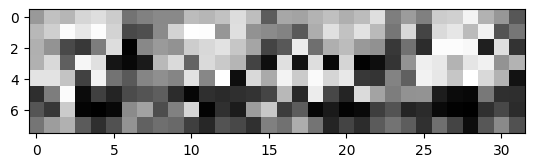

In [245]:
generator = Generator(noise_size, img_channels)
generator = generator.double()
fake = generator(noise)
print(f"Dimension of generated images: {fake.shape}")
fake_np = fake.detach().numpy()
plt.imshow(np.concatenate((fake_np[0][0],fake_np[1][0],fake_np[2][0],fake_np[3][0]),axis=1), cmap='gray')

<h3>Dyscriminator implementation:</h3>

Architecture: 2 x (`Conv2d` -> `BatchNorm2d` -> `LeakyReLU`) -> `Conv2d` -> `Sigmoid`

- Dimension of the image after convolution:
\begin{equation*}
    sample\_size_{\textrm{new}} = \frac{sample\_size_{\textrm{original}} + 2 \cdot padding - kernel\_size}{stride} + 1 
\end{equation*}

In [254]:
class Discriminator(torch.nn.Module):
    """
    Implementation of the CNN architectur 2 x (Conv2d -> BatchNorm2d -> LeakyReLU) -> Conv2d ->Sigmoid 
    """
    def __init__(self, input_channels, output_channels, padding=0, stride=1) -> None:
        super().__init__()
        number_of_convolution_channels = [128, 64] # Number of channels after next convolutions.
        kernel_sizes = [4, 5, 1] # Size of kernels.
        self.first_layer = torch.nn.Sequential(
            torch.nn.Conv2d(
                in_channels=input_channels, # INPUT
                out_channels=number_of_convolution_channels[0], # OUTPUT
                kernel_size=kernel_sizes[0], # KERNEL_SIZE
                padding=padding, # PADDING
                stride=stride # STRIDE
            ),
            torch.nn.BatchNorm2d(num_features=number_of_convolution_channels[0]), # OUTPUT
            torch.nn.LeakyReLU()
        )
        self.second_layer = torch.nn.Sequential(
            torch.nn.Conv2d(
                in_channels=number_of_convolution_channels[0], # INPUT
                out_channels=number_of_convolution_channels[1], # OUTPUT
                kernel_size=kernel_sizes[1], # KERNEL_SIZE
                padding=padding, # PADDING
                stride=stride # STRIDE
            ),
            torch.nn.BatchNorm2d(num_features=number_of_convolution_channels[1]), # OUTPUT
            torch.nn.LeakyReLU()
        )
        self.third_layer = torch.nn.Sequential(
            torch.nn.Conv2d(
                in_channels=number_of_convolution_channels[1], # INPUT
                out_channels=output_channels, # OUTPUT
                kernel_size=kernel_sizes[2], # KERNEL_SIZE
                padding=padding, # PADDING
                stride=stride # STRIDE
            ),
            torch.nn.Sigmoid()
        )
        
    def forward(self, images):
        """
        Defining flow of the CNN web.
        """
        out = self.first_layer(images)
        out = self.second_layer(out)
        out = self.third_layer(out)
        return torch.squeeze(out)
        

In [259]:
disc = Discriminator(img_channels, 1) 
disc = disc.double()
pred = np.round(disc(fake).detach().numpy())
accuracy = np.mean(pred == np.zeros_like(pred)) * 100
print("Wymiary wygenerowanych obrazków: " + str(pred.shape))
print("Dokładność zainicjowanego dyskryminatora na wygenerowanych obrazkach: " + str(accuracy) + "%")
real_batch = real[0:4,:,:,:]
pred = np.round(disc(real_batch).detach().numpy())
accuracy = np.mean(pred == np.ones_like(pred)) * 100
print("Dokładność zainicjowanego dyskryminatora na rzeczywistych obrazkach: " + str(accuracy) + "%")

Wymiary wygenerowanych obrazków: (4,)
Dokładność zainicjowanego dyskryminatora na wygenerowanych obrazkach: 25.0%
Dokładność zainicjowanego dyskryminatora na rzeczywistych obrazkach: 50.0%


<h3>Model training:<h3>

Used methods:
- Adam optimizer,
- Object for optimizing generator's parameters,
- Object for optimizing discriminator's parameters,

Hyperparameters:

- learning constant $\alpha$ (argument `lr`) = 0,002,
- B1 and B1 (`betas`) = 0,999 and 0,500,
- we don't use regularizations (`weight_decay` = None).

Optimizing function (cost function):

a) Discriminator cost function:

\begin{equation*}
    J_d = -\frac{1}{m} \sum_{i=1}^{m} [\log(D(x^{(i)})) + \log(1-D(G(z^{(i)}))) ]
\end{equation*}

b) Generator cost function:

   \begin{equation*}
        J_g = -\frac{1}{m} \sum_{i=1}^{m} \log(D(G(z^{(i)})))
    \end{equation*}


Legend:
- m - means number of images in the mini batch (`batch_size` field of `DataLoader` class),
- $G(z^{(i)})$ - fake image generated by generator from sample of noise $z^{(i)}$,
- $D(x^{(i)})$ - discriminator response on $i$-sample real data, $D(G(z^{(i)}))$ is response to this fake image.

In [269]:
def train_GAN(data_loader, img_channels, noise_size):
    """
    GAN's training.
    """
    # Necessary variables:
    step = 0             # Number of parameters updates.
    lr = 0.0002          # Adam's learning constant.
    betas = (0.5, 0.999) # Adam's betas
    
    # Generator initialization and his optimizer:
    gen = Generator(noise_size, img_channels) 
    gen = gen.double()
    optimizer_gen = torch.optim.Adam(params=gen.parameters(), lr=lr, betas=betas)

    # Discriminator initialization and his optimizer:
    disc = Discriminator(img_channels, 1) 
    disc = disc.double()
    optimizer_disc = torch.optim.Adam(params=disc.parameters(), lr=lr, betas=betas)
    
    # Setting up training mode:
    gen.train()
    disc.train()
    for i in range(200):
        for real in tqdm.tqdm(data_loader):
            step = step + 1
            # Generating noise.
            noise = generate_noise(real[0].shape[0], noise_size)
            # Doing forward pass on the generator - generating images based on previous noise
            fake = gen(noise)

            # Discrimator optimization:
            # 1. Calculating prediction on generated images.
            pred_fake = disc(fake.detach())
            # 2. Calculating prediction on real images.
            pred_real = disc(real[0])
            # 3. Calculating cost.
            loss_disc = (torch.log(pred_real) + torch.log(1 - pred_fake)) / (-data_loader.batch_size)
            # 4. Zeroing gradients.            
            optimizer_disc.zero_grad()
            # 5. Doing backpropagation.
            loss_disc = loss_disc.mean()
            loss_disc.backward(retain_graph=True)
            # 6. Doing one iteration for optimizer.
            optimizer_disc.step()

            # Generator optimization:
            # 1. Calculating cost on generated images.
            pred_fake = disc(fake)
            loss_gen = torch.log(pred_fake) / (-data_loader.batch_size)
            # 2. Zeroing gradients.
            optimizer_gen.zero_grad()
            loss_gen = loss_gen.mean()
            # 3. Doing backpropagation.
            loss_gen.backward(retain_graph=True)
            # 4. Doing one iteration for optimizer.
            optimizer_gen.step()
            
            if step%1000==0:
                print(f"Iteration: {step}")
                print(f"Generator's cost: {loss_gen}")
                print(f"Discrimator's cost: {loss_disc}")
                fake = fake.detach().numpy()
                plt.figure()
                plt.imshow(np.concatenate((fake[0][0],fake[1][0],fake[2][0], fake[3][0]),axis=1), cmap='gray')
                plt.show(block=False)
    return gen

<h3>Training:</h3>

  0%|          | 0/28 [00:00<?, ?it/s]

 64%|██████▍   | 18/28 [00:01<00:00, 11.20it/s]

Iteracja 1000:
 Koszt generatora: tensor(0.0189, dtype=torch.float64, grad_fn=<MeanBackward0>)
 Koszt dyskryminatora: tensor(0.0133, dtype=torch.float64, grad_fn=<MeanBackward0>)


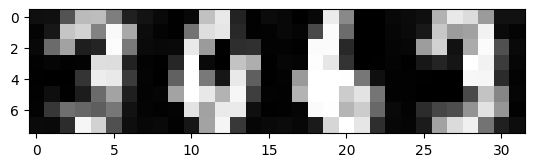

 36%|███▌      | 10/28 [00:00<00:01, 12.35it/s]

Iteracja 2000:
 Koszt generatora: tensor(0.0251, dtype=torch.float64, grad_fn=<MeanBackward0>)
 Koszt dyskryminatora: tensor(0.0100, dtype=torch.float64, grad_fn=<MeanBackward0>)


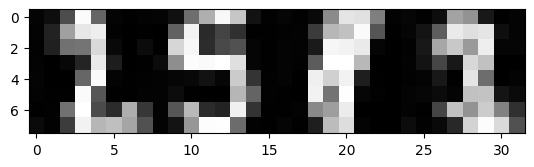

  7%|▋         | 2/28 [00:00<00:02, 12.25it/s]

Iteracja 3000:
 Koszt generatora: tensor(0.0273, dtype=torch.float64, grad_fn=<MeanBackward0>)
 Koszt dyskryminatora: tensor(0.0101, dtype=torch.float64, grad_fn=<MeanBackward0>)


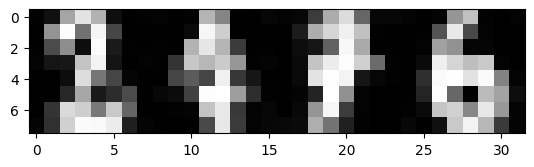

 79%|███████▊  | 22/28 [00:01<00:00, 12.04it/s]

Iteracja 4000:
 Koszt generatora: tensor(0.0252, dtype=torch.float64, grad_fn=<MeanBackward0>)
 Koszt dyskryminatora: tensor(0.0117, dtype=torch.float64, grad_fn=<MeanBackward0>)


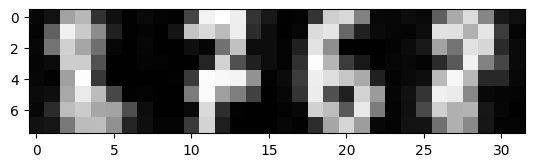

 50%|█████     | 14/28 [00:01<00:01, 12.60it/s]

Iteracja 5000:
 Koszt generatora: tensor(0.0337, dtype=torch.float64, grad_fn=<MeanBackward0>)
 Koszt dyskryminatora: tensor(0.0076, dtype=torch.float64, grad_fn=<MeanBackward0>)


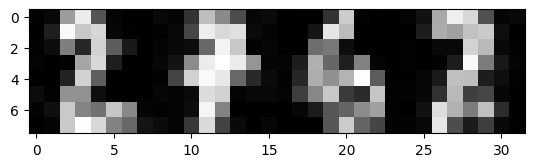

100%|██████████| 28/28 [00:02<00:00, 11.54it/s]


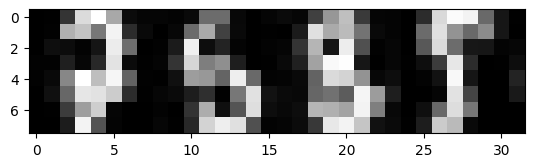

In [270]:
gen = train_GAN(data_loader, img_channels, noise_size)
fake = gen(noise).detach().numpy()
plt.imshow(np.concatenate((fake[0][0],fake[1][0],fake[2][0], fake[3][0]),axis=1), cmap='gray')

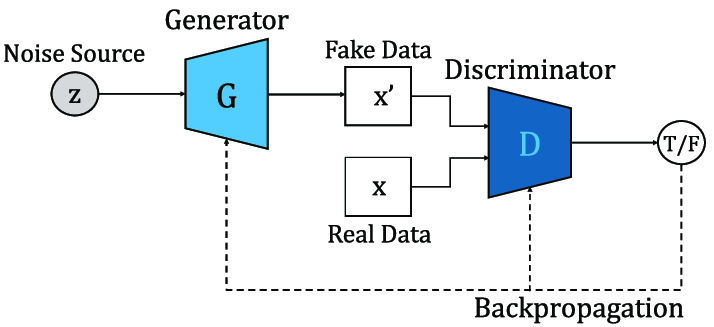